# DOMAIN: Telecom


## CONTEXT: 

A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

## DATA DESCRIPTION: 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

## PROJECT OBJECTIVE: 
Build a model that will help to identify the potential customers who have a higher probability to churn. This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising customer retention.

• Steps to the project:

1. Import and warehouse data:

• Import all the given datasets from MYSQL server. Explore shape and size. 

• Merge all datasets onto one and explore final shape and size.

2. Data cleansing: 
• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

• Automate all the above steps

3. Data analysis & visualisation: 

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

4. Data pre-processing: 

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data.

5. Model training, testing and tuning: 

• Train and test all ensemble models taught in the learning module.

• Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data. 

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model. 

• Pickle the selected model for future use.

6. GUI development: 

• Design a clickable GUI desk application or web service application.

• This GUI should allow the user to input all future values and on a click use these values on the trained model above to predict.

• It should display the prediction.

7. Conclusion and improvisation: 
• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.

In [1]:
#import mysql.connector as sql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

%matplotlib inline

# 1. Import and warehouse data:

In [2]:
# db_connection = sql.connect(host = '127.0.0.1', database = 'dataset1', user = 'root' , password = 'ashutosh49')
# df1=pd.read_sql('SELECT * FROM telcomcustomerchurn_1', con=db_connection)

In [3]:
#df1=df1.drop(df1[['telcomcustomerchurn_1_id']],axis=1)
#df1

In [4]:
#df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
#df1

### Since the data from telcomcustomer-churn_2 cannot be opened in MySQL, we will be directly importing the data from the .csv file.

In [5]:
#df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
#df2

In [6]:
#print(df1.shape)
#print(df2.shape)
#print(df1.size)
#print(df2.size)

In [7]:
#df=pd.merge(df1,df2,left_index=True, right_index=True)
#df

### In this project, I have tried to use MySQL and was also successful in it. But the MySQL connector library and Xgboost library did not support the same python versions. Hence, I had to make a choice between one of the two libraries.
## I have written the MySQL code above in comments.

In [8]:
df = pd.read_csv('TelcomCustomer-Churn.csv')

In [9]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. data cleansing

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
print(df.gender.value_counts())
print(df.SeniorCitizen.value_counts())
print(df.Partner.value_counts())
print(df.Dependents.value_counts())
print(df.PhoneService.value_counts())
print(df.MultipleLines.value_counts())
print(df.InternetService.value_counts())
print(df.OnlineSecurity.value_counts())
print(df.OnlineBackup.value_counts())
print(df.DeviceProtection.value_counts())
print(df.TechSupport.value_counts())
print(df.StreamingTV.value_counts())
print(df.StreamingMovies.value_counts())
print(df.Contract.value_counts())
print(df.PaperlessBilling.value_counts())
print(df.PaymentMethod.value_counts())
print(df.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

In [15]:
replaceStruct= {
    "gender" : {"Female" : 0, "Male" : 1},
    "Partner" : {"No": 0, "Yes": 1},
    "Dependents" : {"No": 0, "Yes": 1},
    "PhoneService" : {"No": 0, "Yes": 1},
    "MultipleLines" : {"No": 0, "Yes": 1, "No phone service" : 0},
    "InternetService" : {"No" :0, "DSL" : 1 , "Fiber optic" : 2},
    "OnlineSecurity" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "OnlineBackup" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "DeviceProtection" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "TechSupport" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "StreamingTV" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "StreamingMovies" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "Contract" : {"Month-to-month": 0 , "One year" : 1 , "Two year" : 2},
    "PaperlessBilling" : {"No": 0, "Yes": 1},
    "PaymentMethod" : {"Electronic check" : 0 , "Mailed check" : 1, "Bank transfer (automatic)" : 2 , "Credit card (automatic)" : 3},
    "Churn" : {"No": 0, "Yes": 1}
}

In [16]:
df=df.replace(replaceStruct)

In [17]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,...,1,0,1,1,0,1,0,99.65,820.5,1
6,1452-KIOVK,1,0,0,1,22,1,1,2,0,...,0,0,1,0,0,1,3,89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,1,...,0,0,0,0,0,0,1,29.75,301.9,0
8,7892-POOKP,0,0,1,0,28,1,1,2,0,...,1,1,1,1,0,1,0,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,0,0,0,1,0,2,56.15,3487.95,0


Since the column of customerID will not provide any meaningful insight in the data, we will drop the column.

In [18]:
df=df.drop(df[['customerID']],axis=1)

The data type of the TotalCharges column is object. So, we convert it to float64. And fill the missing values with the mean of the data.

In [19]:
df.TotalCharges= pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges=df.TotalCharges.fillna(np.mean(df.TotalCharges))

# 3. Data analysis & visualisation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [21]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.000,0.00,1.00,1.00
InternetService,7043.0,1.222916,0.778877,0.00,1.000,1.00,2.00,2.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.000,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.000,0.00,1.00,1.00


<AxesSubplot:xlabel='tenure', ylabel='Count'>

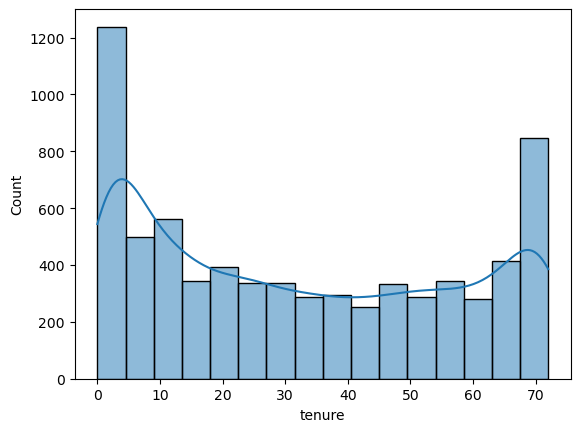

In [22]:
sns.histplot(df.tenure,kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

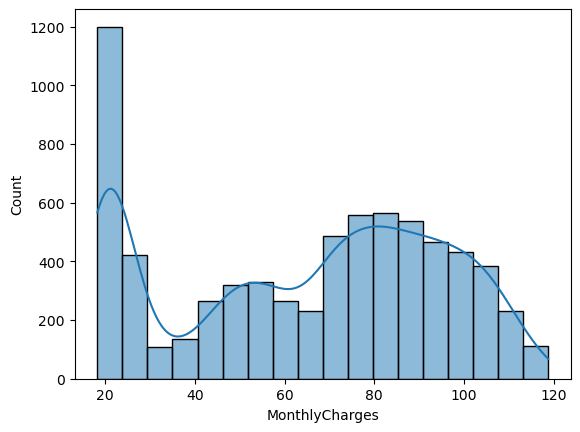

In [23]:
sns.histplot(df.MonthlyCharges,kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

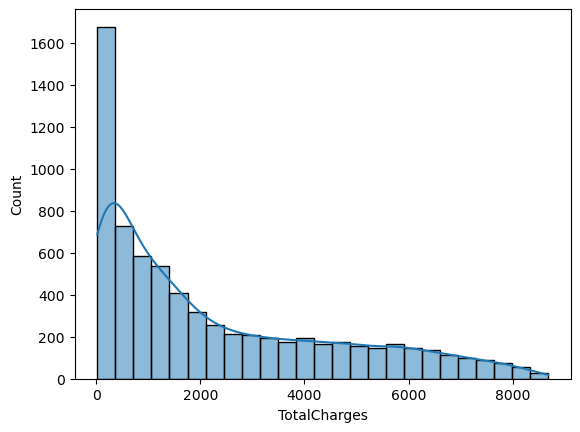

In [24]:
sns.histplot(df.TotalCharges,kde=True)

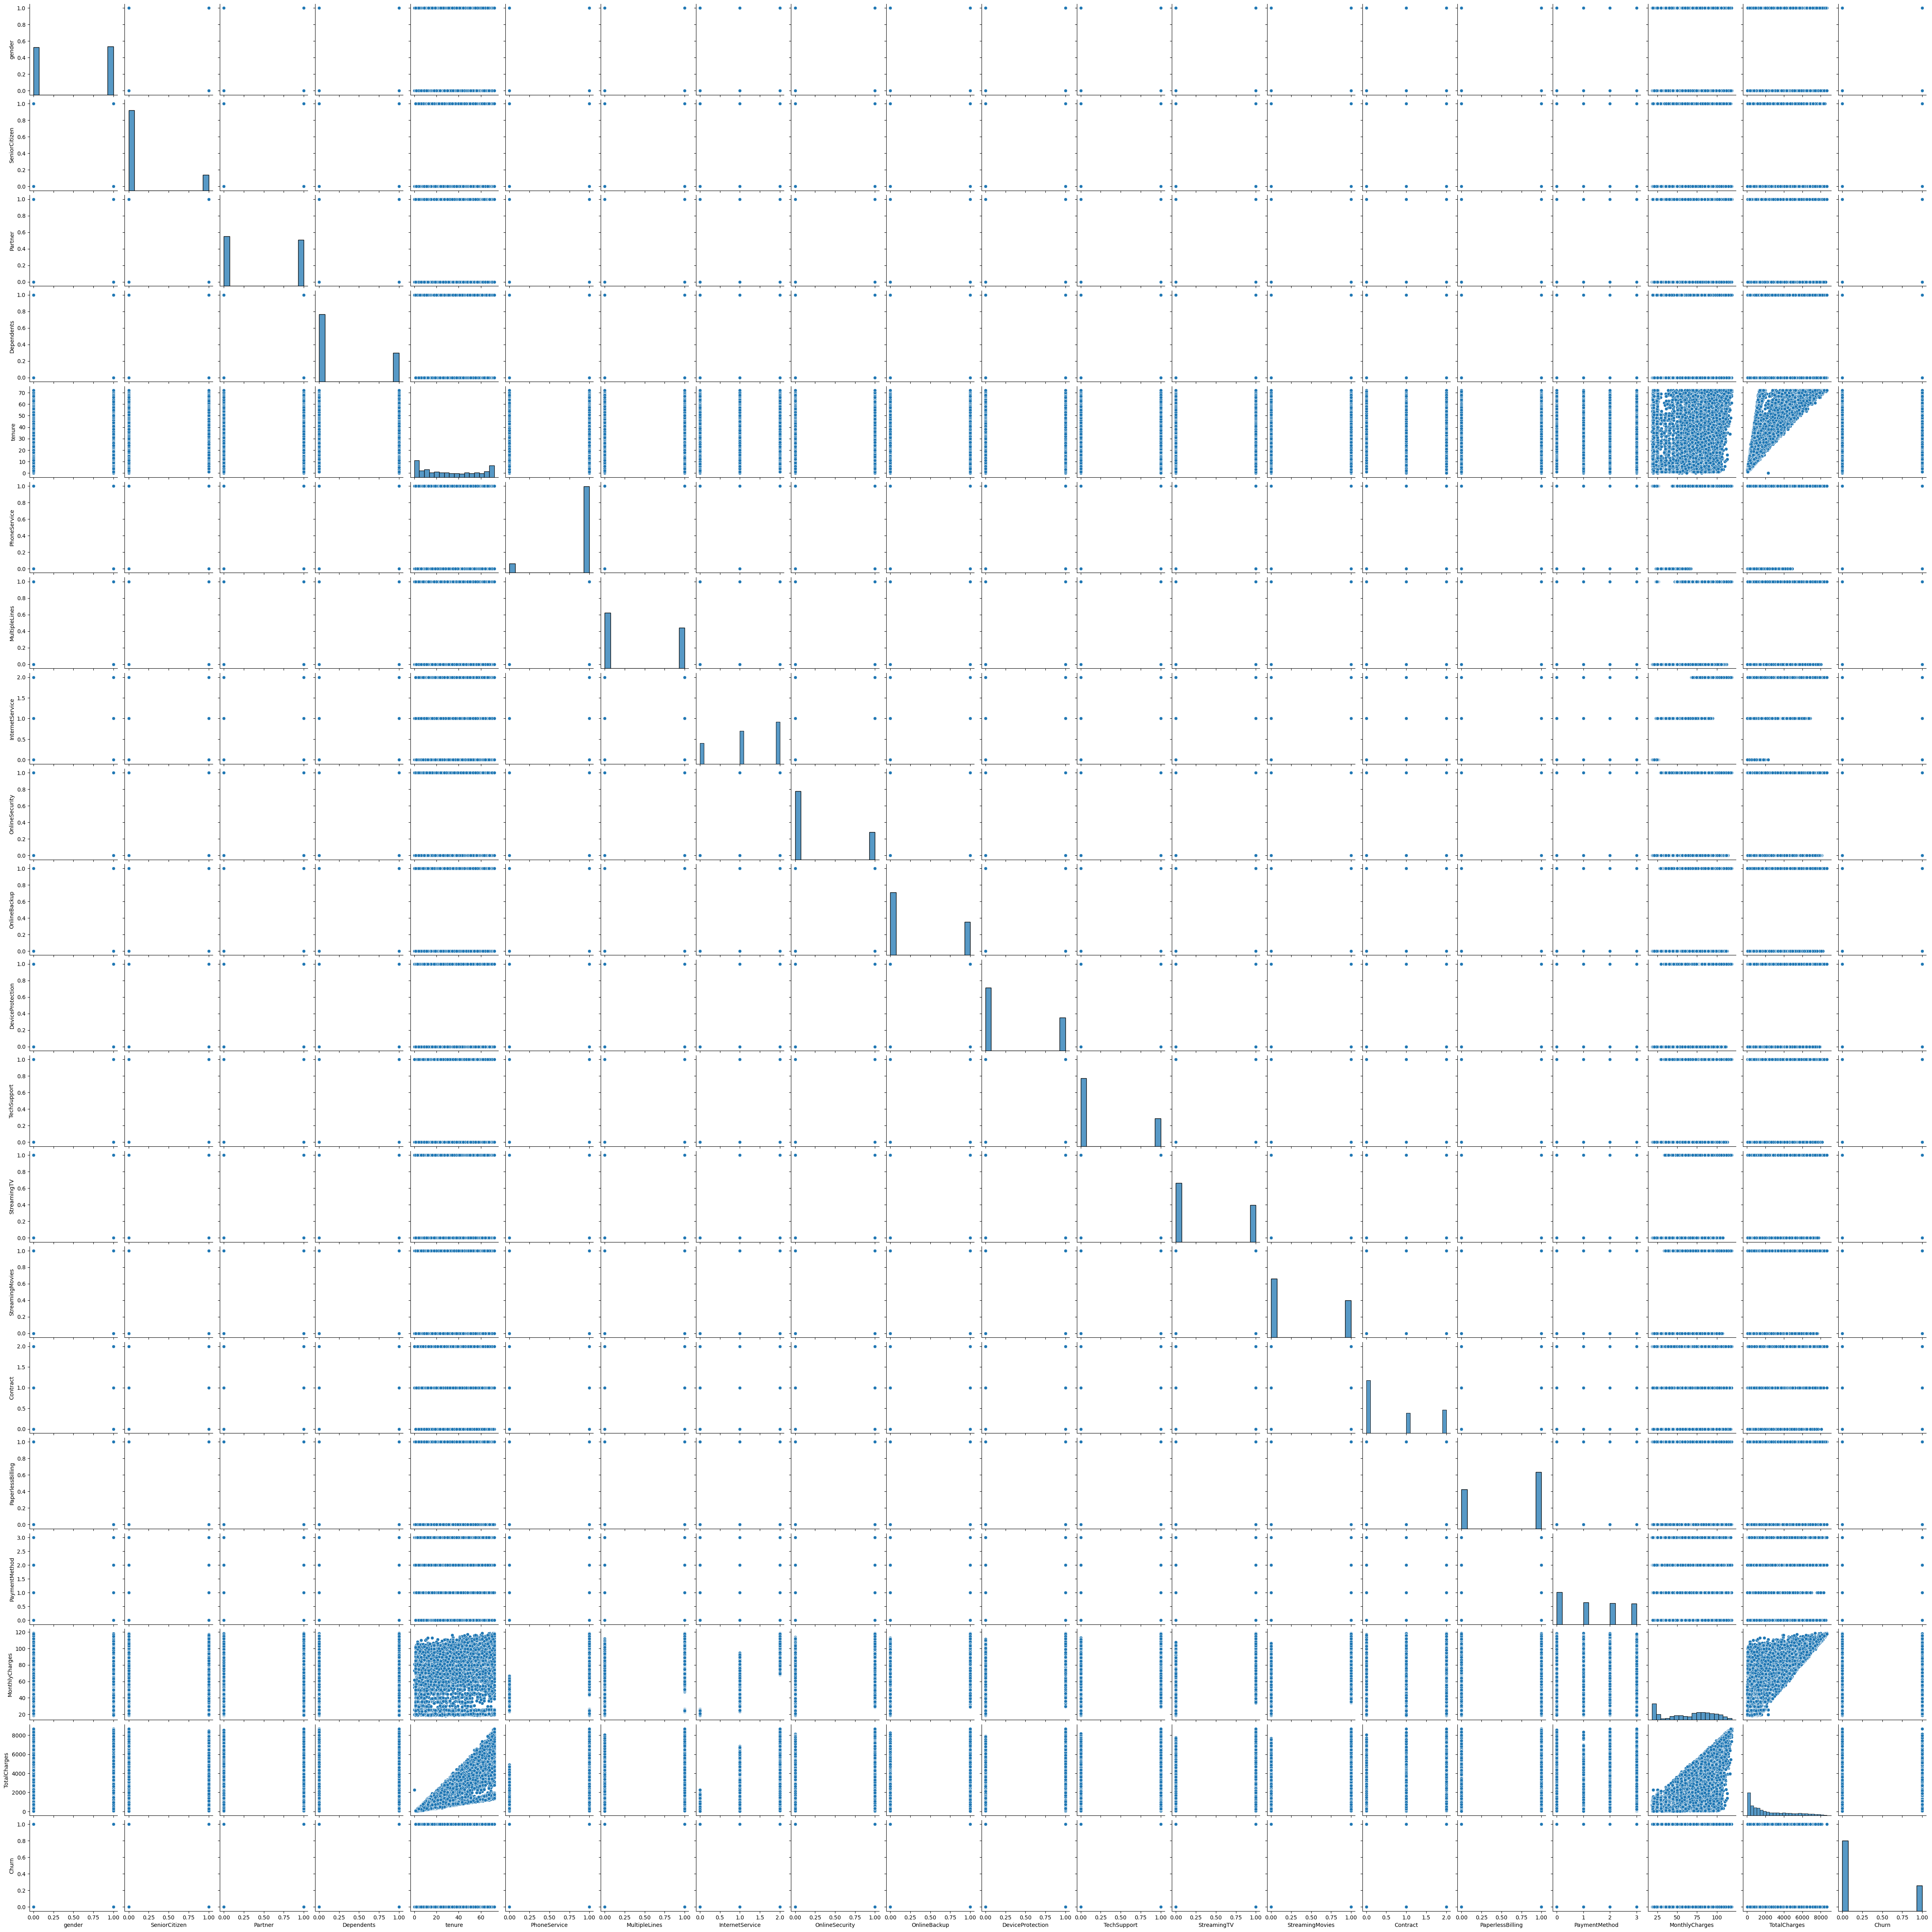

In [25]:
sns.pairplot(df)

In [26]:
correl=df.corr()
correl

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.010380,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.112851,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.468689,0.040102
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.427749,0.316846
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.412245,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.509692,-0.082255


<AxesSubplot:>

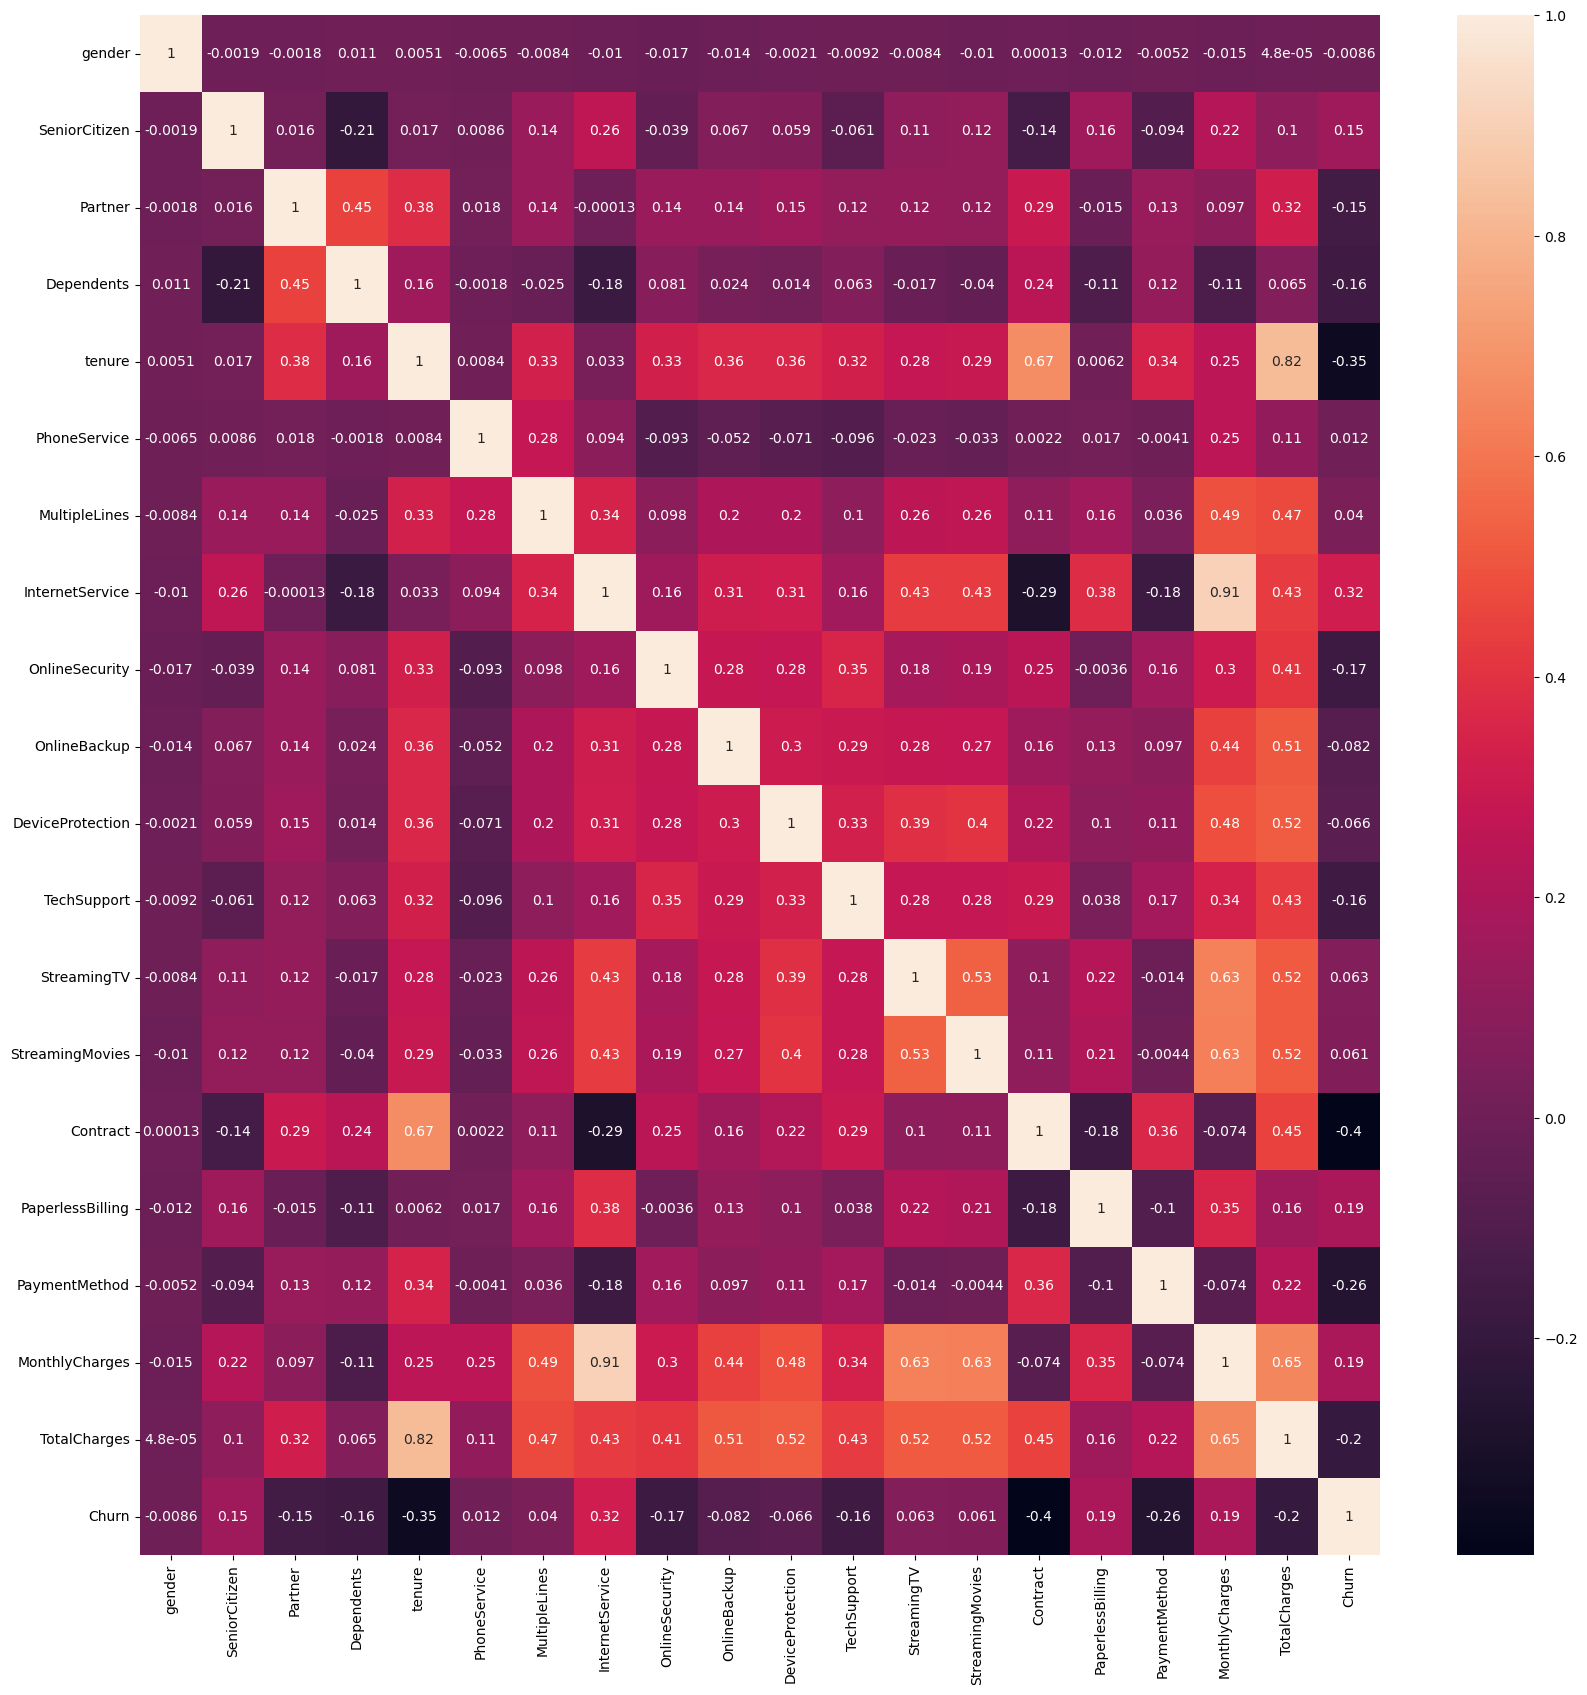

In [27]:
plt.subplots(figsize=(20,20))
sns.heatmap(correl,annot=True)

# 4. Data pre-processing:

In [28]:
X=df.drop(df[['Churn']],axis=1)
y=df[['Churn']]

In [29]:
y.value_counts()/y.value_counts().sum()*100

Churn
0        73.463013
1        26.536987
dtype: float64

### 73.46% of the Churn data is belongs to the category 0 i.e. Customer will not churn
### and 26.53% of the Churn data is belongs to the category 1 i.e. Customer will churn
### target balancing is not required

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# 5. Model training, testing and tuning: 

# Ensemble Techniques - Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [32]:
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

0.9979716024340771
0.7207761476573592


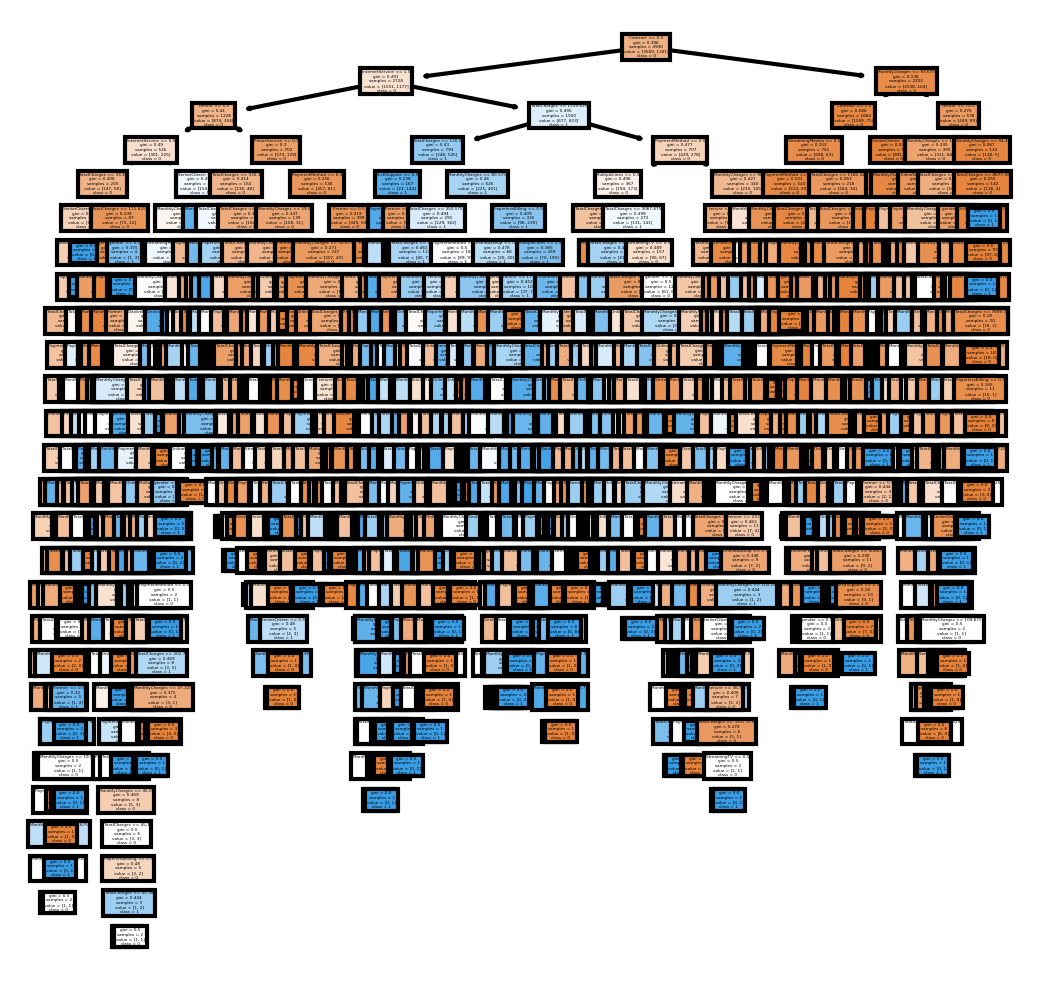

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=list(X_train)
cn=["0","1"]
fig,axes=plt.subplots(nrows =1, ncols=1, figsize=(4,4),dpi=300)
plot_tree(dTree,feature_names = fn, class_names=cn, filled= True)
fig.savefig("dtree.png")

In [34]:
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.025630
SeniorCitizen     0.020211
Partner           0.026559
Dependents        0.017620
tenure            0.090914
PhoneService      0.003204
MultipleLines     0.014377
InternetService   0.055497
OnlineSecurity    0.016199
OnlineBackup      0.018723
DeviceProtection  0.016632
TechSupport       0.019530
StreamingTV       0.015933
StreamingMovies   0.008560
Contract          0.162867
PaperlessBilling  0.017909
PaymentMethod     0.048859
MonthlyCharges    0.206119
TotalCharges      0.214658


In [35]:
decTree=DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1)
decTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [36]:
print(decTree.score(X_train,y_train))
print(decTree.score(X_test,y_test))

0.7910750507099391
0.7950780880265026


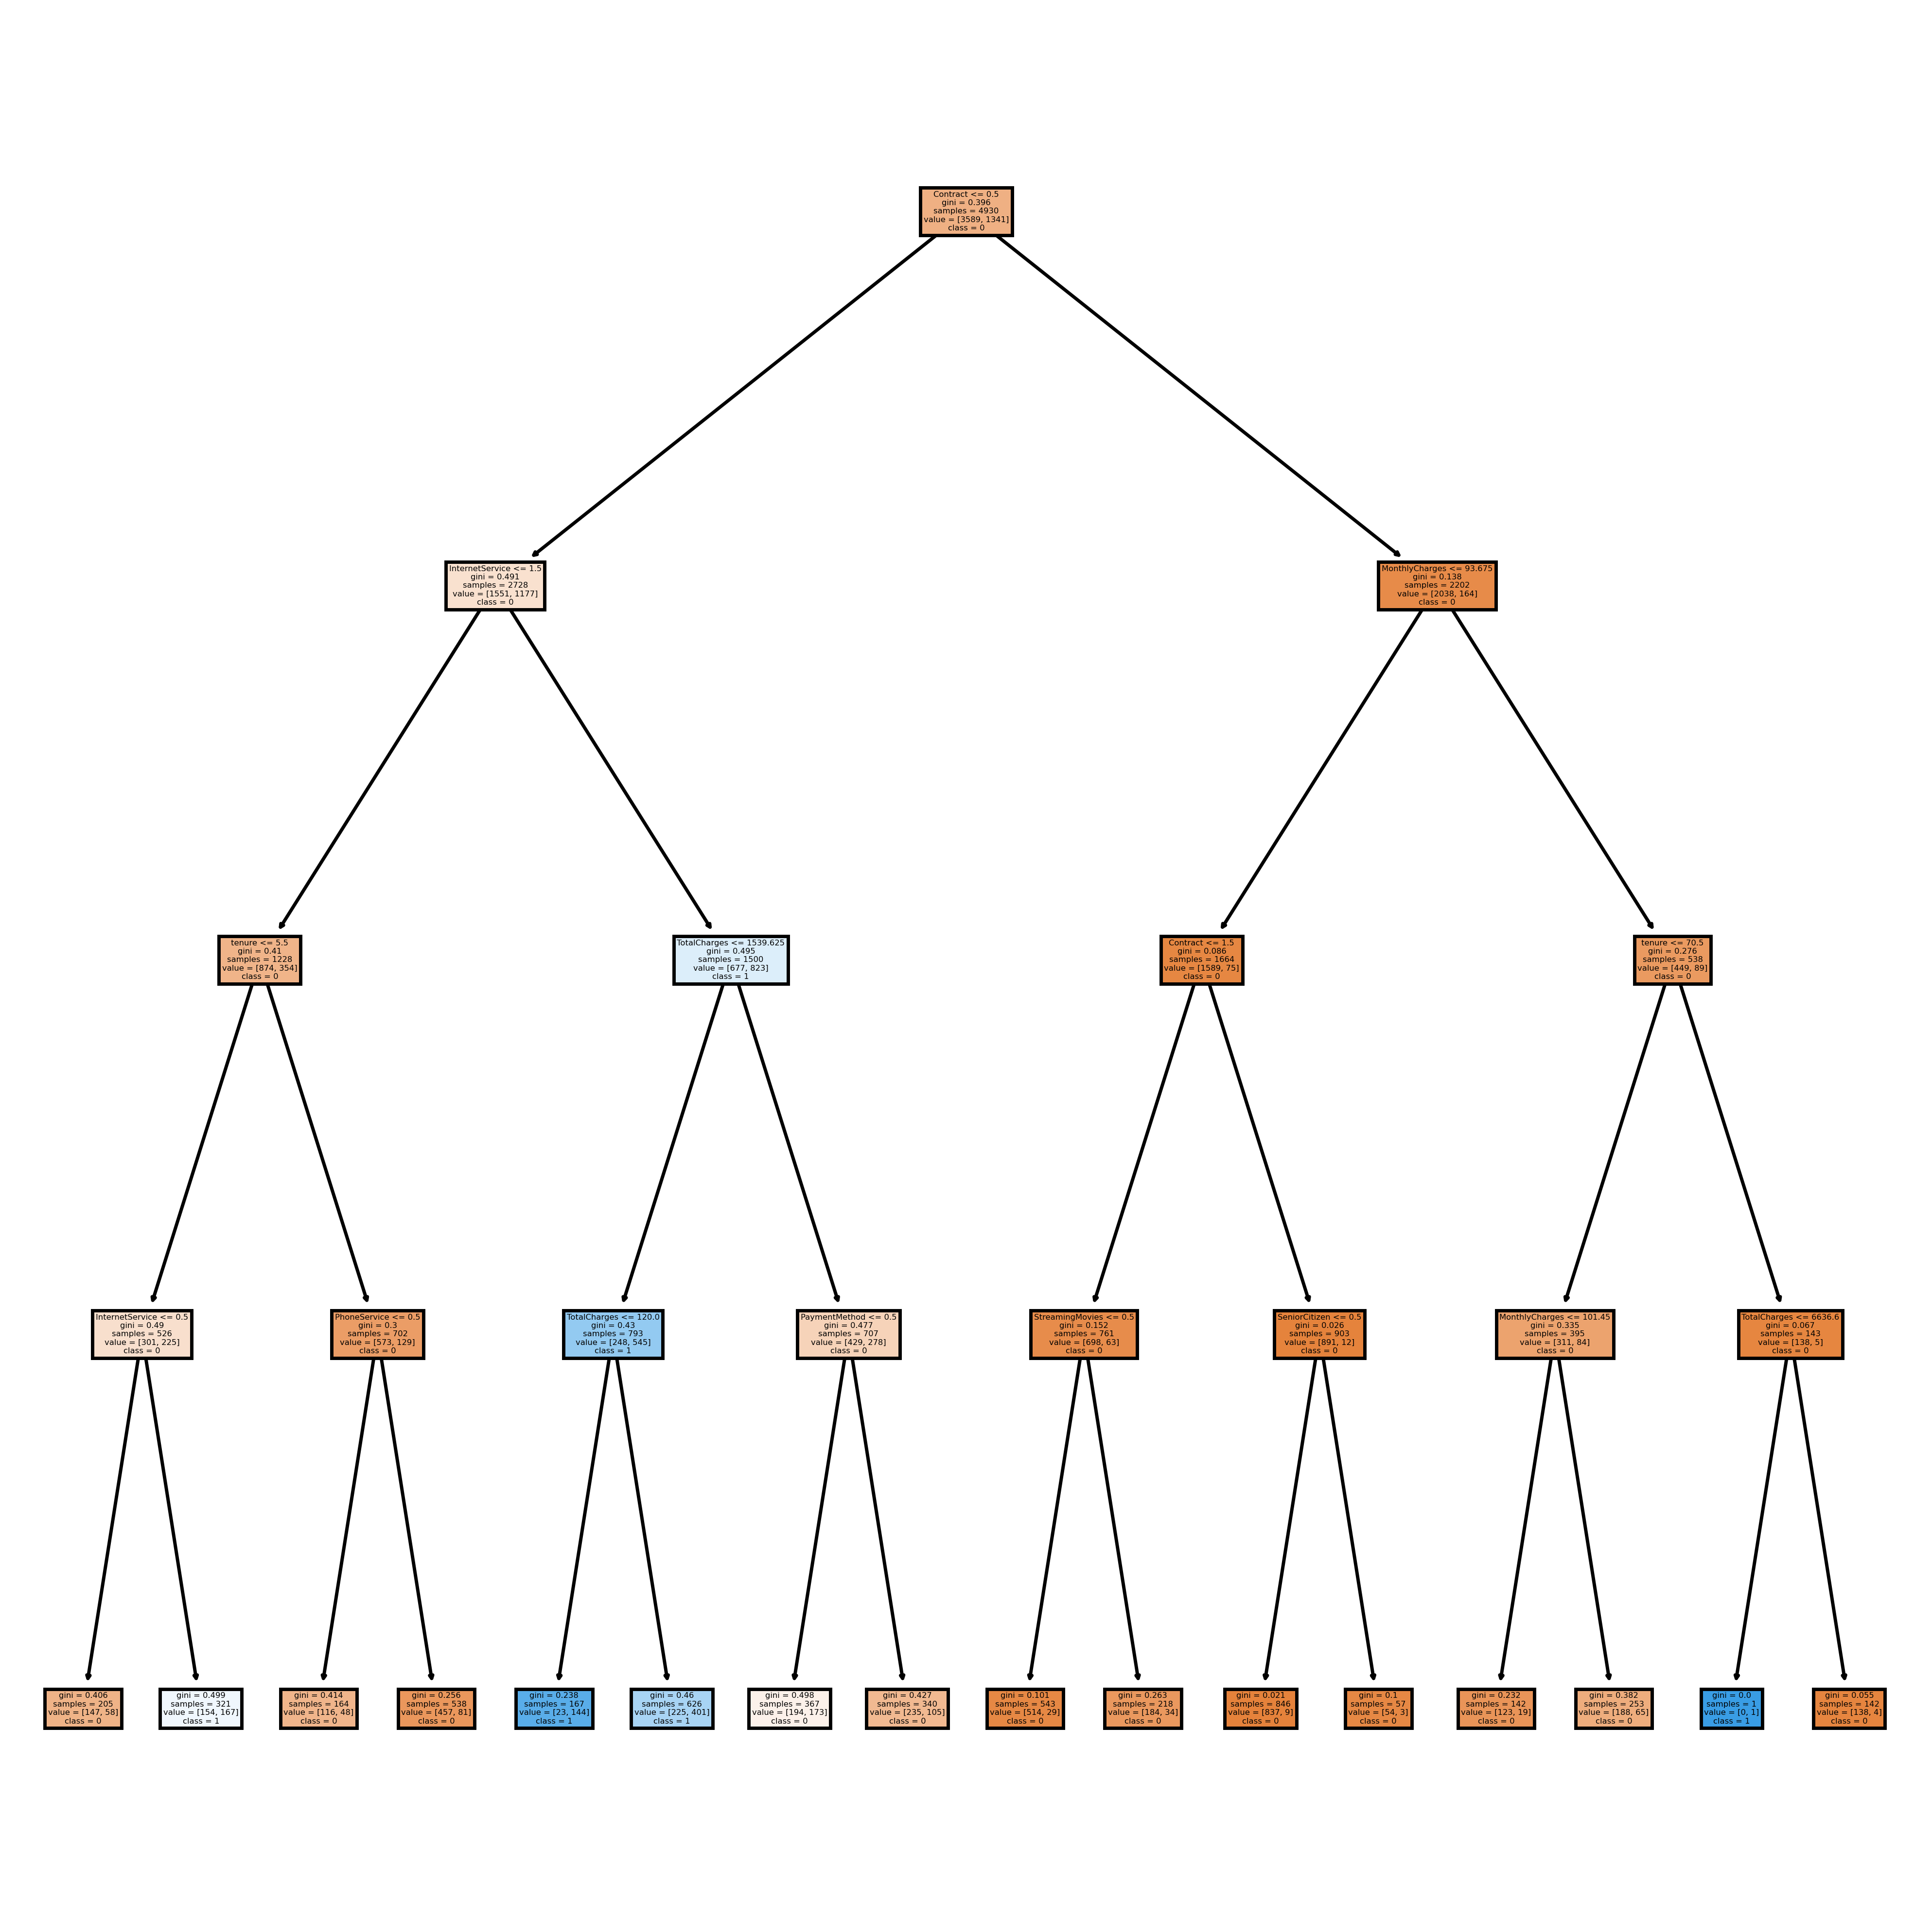

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=X_train.columns
cn=["0","1"]
fig,axes=plt.subplots(nrows =1, ncols=1, figsize=(10,10),dpi=500)
plot_tree(decTree,feature_names = fn, class_names=cn, filled= True)
fig.savefig("dectree.png")

In [38]:
print (pd.DataFrame(decTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.000000
SeniorCitizen     0.000328
Partner           0.000000
Dependents        0.000000
tenure            0.073862
PhoneService      0.008838
MultipleLines     0.000000
InternetService   0.183915
OnlineSecurity    0.000000
OnlineBackup      0.000000
DeviceProtection  0.000000
TechSupport       0.000000
StreamingTV       0.000000
StreamingMovies   0.005696
Contract          0.547488
PaperlessBilling  0.000000
PaymentMethod     0.016238
MonthlyCharges    0.025301
TotalCharges      0.138334


<AxesSubplot:>

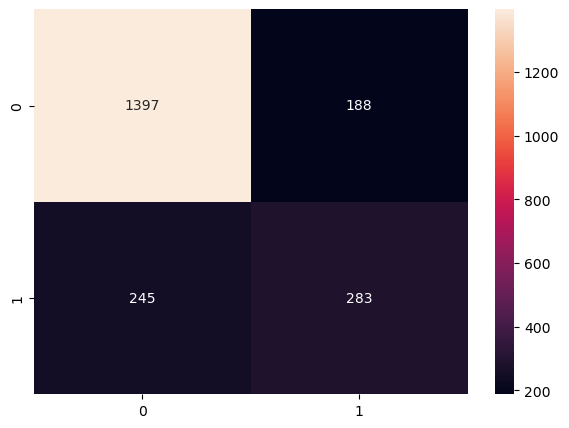

In [39]:
from sklearn.metrics import confusion_matrix
y_predict = decTree.predict(X_test)
cm=confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm,index = [i for i in ["0","1"]],columns = [i for i in ["0","1"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt= 'g')

# Ensemble Learning - Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(base_estimator=decTree,n_estimators=50, random_state=1)
bgcl = bgcl.fit(X_train,y_train)

C:\Users\ac253\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7957403651115619
0.7993374349266446


<AxesSubplot:>

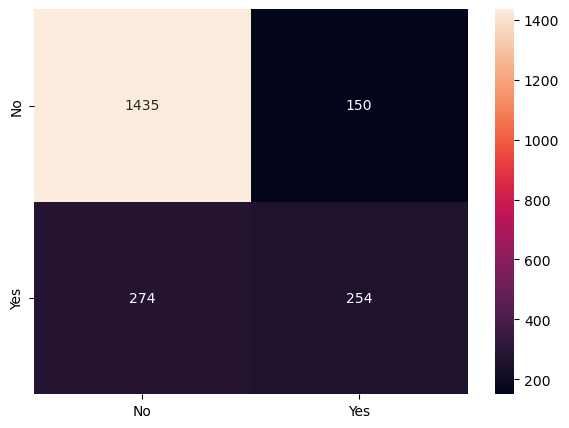

In [41]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_train,y_train))
print(bgcl.score(X_test,y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [42]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(max_depth=3)
abcl = AdaBoostClassifier(base_estimator =tree,n_estimators=100, learning_rate =1.5,algorithm="SAMME", random_state=1)
abcl = abcl.fit(X_train, y_train)
print(abcl)

C:\Users\ac253\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5, n_estimators=100, random_state=1)


0.8192697768762678
0.8045433033601515


<AxesSubplot:>

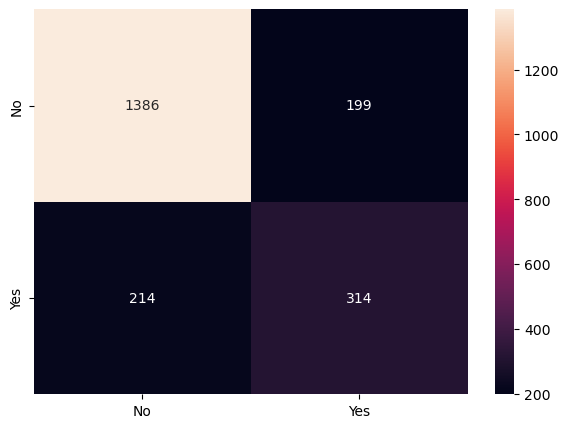

In [43]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_train , y_train))
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [44]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 3],
              "n_estimators": [50, 100, 200]
             }

In [45]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.1,
    algorithm="SAMME.R")

In [46]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [47]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\ac253\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ac253\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ac253\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ac253\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.1),
             param_grid={'base_estimator__max_depth': [2, 3],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [48]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.204770,0.005487,0.018837,0.000203,2,50,"{'base_estimator__max_depth': 2, 'n_estimators...",0.836172,0.849138,0.832622,0.839311,0.007099,1,0.860633,0.854281,0.859693,0.858202,0.002799
1,0.398784,0.006939,0.034112,0.001243,2,100,"{'base_estimator__max_depth': 2, 'n_estimators...",0.825186,0.835080,0.828153,0.829473,0.004146,2,0.877295,0.870168,0.873444,0.873636,0.002913
2,0.781104,0.006401,0.063853,0.003125,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.814284,0.831301,0.815823,0.820469,0.007685,4,0.897093,0.892028,0.893575,0.894232,0.002119
3,0.243912,0.003134,0.018323,0.000479,3,50,"{'base_estimator__max_depth': 3, 'n_estimators...",0.823562,0.838109,0.816245,0.825972,0.009087,3,0.885623,0.877856,0.890066,0.884515,0.005046
4,0.502186,0.019282,0.034670,0.000942,3,100,"{'base_estimator__max_depth': 3, 'n_estimators...",0.809936,0.823085,0.804113,0.812378,0.007935,5,0.917819,0.904767,0.924529,0.915705,0.008205
5,1.028534,0.009066,0.065568,0.002125,3,200,"{'base_estimator__max_depth': 3, 'n_estimators...",0.798601,0.797358,0.790042,0.795334,0.003776,6,0.957467,0.953648,0.960795,0.957303,0.002920


In [ ]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


# Ensemble Learning - GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
# parameter grid
param_grid = {"learning_rate": [0.6,1.0, 1.5],
              "subsample": [0.3, 0.6, 0.9]
             }

In [ ]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [ ]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

In [ ]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


# Ensemble Learning - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:
y_predict = rfcl.predict(X_test)

print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - XGBoost

In [ ]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.1, 0.2, 0.3]}          


# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [ ]:
# fit the model
model_cv.fit(X_train, y_train)       

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.1, 0.2,0.3]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.1,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.2,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

In [ ]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

The first column in y_pred is the P(0), i.e. P(not fraud), and the second column is P(1/fraud).

In [ ]:
# roc_auc
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

Finally, let's also look at the feature importances.

In [ ]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# 6. GUI development:

In [ ]:
import tkinter
from tkinter import ttk
from tkinter.ttk import *

In [ ]:
replaceStructure= {
    "gender" : {"Female" : 0, "Male" : 1},
    "SeniorCitizen" : {"0":0,"1":1},
    "Partner" : {"No": 0, "Yes": 1},
    "Dependents" : {"No": 0, "Yes": 1},
    "PhoneService" : {"No": 0, "Yes": 1},
    "MultipleLines" : {"No": 0, "Yes": 1, "No phone service" : 0},
    "InternetService" : {"No" :0, "DSL" : 1 , "Fiber optic" : 2},
    "OnlineSecurity" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "OnlineBackup" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "DeviceProtection" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "TechSupport" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "StreamingTV" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "StreamingMovies" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "Contract" : {"Month-to-month": 0 , "One year" : 1 , "Two year" : 2},
    "PaperlessBilling" : {"No": 0, "Yes": 1},
    "PaymentMethod" : {"Electronic check" : 0 , "Mailed check" : 1, "Bank transfer (automatic)" : 2 , "Credit card (automatic)" : 3},
    "Churn" : {"No": 0, "Yes": 1}
}

In [ ]:
def gender_select(event):
    global vargender
    vargender= combo0.get()
    
def SeniorCitizen_select(event):
    global varSeniorCitizen
    varSeniorCitizen= combo1.get()
    
def Partner_select(event):
    global varPartner
    varPartner= combo2.get()
    
def Dependents_select(event):
    global varDependents
    varDependents= combo3.get()
    
def PhoneService_select(event):
    global varPhoneService
    varPhoneService= combo5.get()

def MultipleLines_select(event):
    global varMultipleLines
    varMultipleLines= combo6.get()
    
def InternetService_select(event):
    global varInternetService
    varInternetService= combo7.get()
    
def OnlineSecurity_select(event):
    global varOnlineSecurity
    varOnlineSecurity= combo8.get()
    
def OnlineBackup_select(event):
    global varOnlineBackup
    varOnlineBackup= combo9.get()
    
def DeviceProtection_select(event):
    global varDeviceProtection
    varDeviceProtection= combo10.get()
    
def TechSupport_select(event):
    global varTechSupport
    varTechSupport= combo11.get()
    
def StreamingTV_select(event):
    global varStreamingTV
    varStreamingTV= combo12.get()
    
def StreamingMovies_select(event):
    global varStreamingMovies
    varStreamingMovies= combo13.get()
    
def Contract_select(event):
    global varContract
    varContract= combo14.get()
    
def PaperlessBilling_select(event):
    global varPaperlessBilling
    varPaperlessBilling= combo15.get()
    
def PaymentMethod_select(event):
    global varPaymentMethod
    varPaymentMethod= combo16.get()

In [ ]:
def func_submit():
    cols=X_train.columns
    global X_predict
    X_predict=pd.DataFrame(columns=cols)
    pd.to_numeric(X_predict.SeniorCitizen, errors='coerce')
    global varTenure
    global varMonthlyCharges
    global varTotalCharges
    varTenure=float(Tenure_var.get())
    varMonthlyCharges=float(MonthlyCharges_var.get())
    varTotalCharges=float(TotalCharges_var.get())
    X_predict.loc[0]=[vargender,varSeniorCitizen,varPartner,varDependents,varTenure,varPhoneService,varMultipleLines,varInternetService,varOnlineSecurity,varOnlineBackup,varDeviceProtection,varTechSupport,varStreamingTV,varStreamingMovies,varContract,varPaperlessBilling,varPaymentMethod,varMonthlyCharges,varTotalCharges]
    X_predict=X_predict.replace(replaceStructure)

In [ ]:
def func_predict():
    global expr
    if model.predict(X_predict)[0]==0:
        expr = "No"
    else:
        expr = "Yes"
    output.set(expr)

In [ ]:
window = tkinter.Tk()
window.title("Ensemble Techniques")

Tenure_var=tkinter.StringVar()
MonthlyCharges_var=tkinter.StringVar()
TotalCharges_var=tkinter.StringVar()
output = tkinter.StringVar()
expr=""

#column 0 - attributes

tkinter.Label(window, text="gender").grid(row=0)              #placed in 0 0
tkinter.Label(window, text="Senior Citizen").grid(row=1)      #placed in 1 0
tkinter.Label(window, text="Partner").grid(row=2)             #placed in 2 0
tkinter.Label(window, text="Dependents").grid(row=3)          #placed in 3 0
tkinter.Label(window, text="Tenure").grid(row=4)              #placed in 4 0
tkinter.Label(window, text="Phone Service").grid(row=5)       #placed in 5 0
tkinter.Label(window, text="Multiple Lines").grid(row=6)      #placed in 6 0
tkinter.Label(window, text="Internet Service").grid(row=7)    #placed in 7 0
tkinter.Label(window, text="Online Security").grid(row=8)     #placed in 8 0
tkinter.Label(window, text="Online Backup").grid(row=9)       #placed in 9 0
tkinter.Label(window, text="Device Protection").grid(row=10)  #placed in 10 0
tkinter.Label(window, text="Tech Support").grid(row=11)       #placed in 11 0
tkinter.Label(window, text="Streaming TV").grid(row=12)       #placed in 12 0
tkinter.Label(window, text="Streaming Movies").grid(row=13)   #placed in 13 0
tkinter.Label(window, text="Contract").grid(row=14)           #placed in 14 0
tkinter.Label(window, text="Paperless Billing").grid(row=15)  #placed in 15 0
tkinter.Label(window, text="Payment Method").grid(row=16)     #placed in 16 0
tkinter.Label(window, text="Monthly Charges").grid(row=17)    #placed in 17 0
tkinter.Label(window, text="Total Charges").grid(row=18)      #placed in 18 0

#column 0 - buttons

btn_submit = tkinter.Button(window, text=' Submit ', fg='black', height=1, width=7,command=func_submit).grid(row=19, column=0)    #placed in 19 0
btn_predict = tkinter.Button(window, text=' Predict ', fg='black', height=1, width=7, command=func_predict).grid(row=20, column=0)  #placed in 20 0



#column 1 - entries

entTenure=tkinter.Entry(window,textvariable = Tenure_var).grid(row=4,column=1)                    #placed in 4 1
entMonthlyCharges=tkinter.Entry(window,textvariable = MonthlyCharges_var).grid(row=17,column=1)   #placed in 17 1
entTotalCharges=tkinter.Entry(window,textvariable = TotalCharges_var).grid(row=18,column=1)       #placed in 18 1

#column 1 - dropdowns

combo0 = ttk.Combobox(window)
combo0['values']=('Female','Male')
combo0.grid(row = 0, column =1)
combo0.bind("<<ComboboxSelected>>", gender_select)            #placed in 0 1

combo1 = ttk.Combobox(window)
combo1['values']=(0,1)
combo1.grid(row = 1, column =1)
combo1.bind("<<ComboboxSelected>>", SeniorCitizen_select)     #placed in 1 1

combo2 = ttk.Combobox(window)
combo2['values']=('No','Yes')
combo2.grid(row = 2, column =1)
combo2.bind("<<ComboboxSelected>>", Partner_select)           #placed in 2 1

combo3 = ttk.Combobox(window)
combo3['values']=('No','Yes')
combo3.grid(row = 3, column =1)
combo3.bind("<<ComboboxSelected>>", Dependents_select)        #placed in 3 1

combo5 = ttk.Combobox(window)
combo5['values']=('No','Yes')
combo5.grid(row = 5, column =1)
combo5.bind("<<ComboboxSelected>>", PhoneService_select)      #placed in 5 1

combo6 = ttk.Combobox(window)
combo6['values']=('No','Yes','No phone service')
combo6.grid(row = 6, column =1)
combo6.bind("<<ComboboxSelected>>", MultipleLines_select)     #placed in 6 1

combo7 = ttk.Combobox(window)
combo7['values']=('No','DSL','Fiber optic')
combo7.grid(row = 7, column =1)
combo7.bind("<<ComboboxSelected>>", InternetService_select)   #placed in 7 1

combo8 = ttk.Combobox(window)
combo8['values']=('No','Yes','No internet service')
combo8.grid(row = 8, column =1)
combo8.bind("<<ComboboxSelected>>", OnlineSecurity_select)    #placed in 8 1

combo9 = ttk.Combobox(window)
combo9['values']=('No','Yes','No internet service')
combo9.grid(row = 9, column =1)
combo9.bind("<<ComboboxSelected>>", OnlineBackup_select)      #placed in 9 1

combo10 = ttk.Combobox(window)
combo10['values']=('No','Yes','No internet service')
combo10.grid(row = 10, column =1)
combo10.bind("<<ComboboxSelected>>", DeviceProtection_select) #placed in 10 1

combo11 = ttk.Combobox(window)
combo11['values']=('No','Yes','No internet service')
combo11.grid(row = 11, column =1)
combo11.bind("<<ComboboxSelected>>", TechSupport_select)      #placed in 11 1

combo12 = ttk.Combobox(window)
combo12['values']=('No','Yes','No internet service')
combo12.grid(row = 12, column =1)
combo12.bind("<<ComboboxSelected>>", StreamingTV_select)      #placed in 12 1

combo13 = ttk.Combobox(window)
combo13['values']=('No','Yes','No internet service')
combo13.grid(row = 13, column =1)
combo13.bind("<<ComboboxSelected>>", StreamingMovies_select) #placed in 13 1

combo14 = ttk.Combobox(window)
combo14['values']=("Month-to-month" , "One year" , "Two year")
combo14.grid(row = 14, column =1)
combo14.bind("<<ComboboxSelected>>", Contract_select)        #placed in 14 1

combo15 = ttk.Combobox(window)
combo15['values']=('No','Yes')
combo15.grid(row = 15, column =1)
combo15.bind("<<ComboboxSelected>>", PaperlessBilling_select)#placed in 15 1

combo16 = ttk.Combobox(window)
combo16['values']=("Electronic check" , "Mailed check" , "Bank transfer (automatic)" , "Credit card (automatic)")
combo16.grid(row = 16, column =1)
combo16.bind("<<ComboboxSelected>>", PaymentMethod_select)  #placed in 16 1


#Output
entoutput=tkinter.Entry(window,textvariable = output).grid(row=20,column=1)

  
window.mainloop()

## Below are the screenshots of the outputs of the GUI

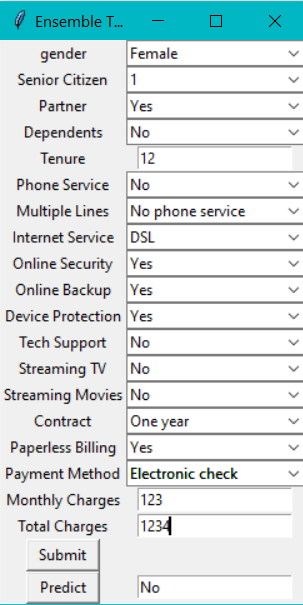

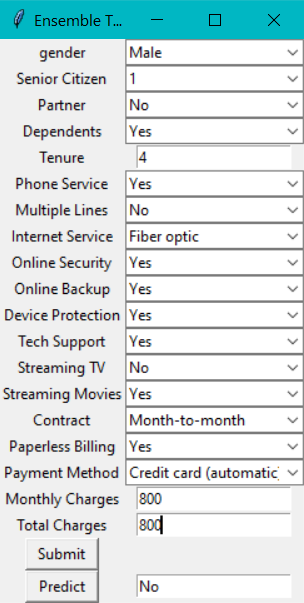

# 7. Conclusion and improvisation:

#### We have implemented a lot of ensemble techniques in the project. We started with a simple decision tree and then we made our way to more and more complex ensemble techniques like Bagging, Adaboosting, GradientBoost, Random Forest and XGboost. For each ensemble technique we have also implemented hyperparameter tuning. Thus ensuring the best fit for the prediction.

#### Apart from the Ensemble Techniques, we have also build a GUI application with Tkinter library. 

#### In future the data should include:

• Level of satisfaction of the user with respect to the product.

• Nature of the competetion that has the potential to take away the customer.

• Level of satisfaction of the user with respect to the services like customer support and offers.